In [11]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("perfomance_sem_s.csv")

In [20]:
df.head()

,model,page,time_1,Noise Robustness,Negative Rejection,Information Integration,Counterfactual Robustness,Score,time_2,time_3,time_4,time_5,faithfulness,answer_relevancy
0,mitral,deepeek,104.04,1,1,3,3,8,119.36,114.97,112.96,112.27,0.886944,0.240890
1,llama_3.1,deepeek,112.00,2,3,1,2,8,110.63,111.86,115.37,109.97,0.718929,0.278314
2,dolphin3,deepeek,109.64,2,3,3,2,10,100.79,102.93,98.64,97.96,0.814167,0.647561
3,zephyr,deepeek,132.50,1,2,3,2,8,115.32,114.14,113.19,115.88,0.796111,0.282483
4,llama_3.1,nlp,150.33,5,6,7,7,25,145.32,136.64,146.60,141.11,0.812115,0.896704


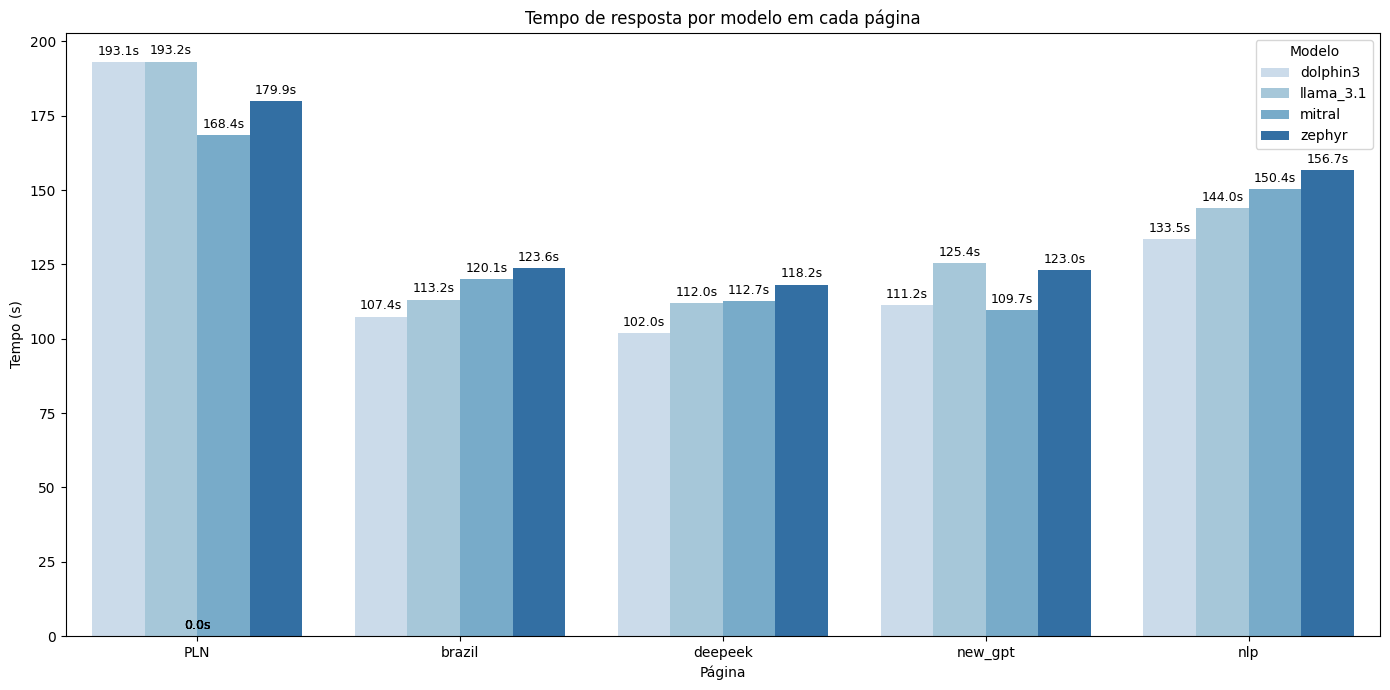

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular tempo médio de execução por linha
df['avg_time'] = df[[col for col in df.columns if col.startswith("time_")]].mean(axis=1)

# Agrupar por página e modelo
df_grouped = df.groupby(['page', 'model'], as_index=False)['avg_time'].sum()

# Paleta de tons de azul personalizados para os modelos
azul_personalizado = ["#c6dbef", "#9ecae1", "#6baed6", "#2171b5"]  # 4 tons de azul

# Criar o gráfico
fig, ax = plt.subplots(figsize=(14, 7))
barplot = sns.barplot(
    data=df_grouped,
    x='page',
    y='avg_time',
    hue='model',
    palette=azul_personalizado,
    ax=ax
)

# Adicionar os valores no topo das barras
for p in barplot.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}s',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, xytext=(0, 3),
                textcoords='offset points')

# Ajustes finais
ax.set_title('Tempo de resposta por modelo em cada página')
ax.set_ylabel('Tempo (s)')
ax.set_xlabel('Página')
ax.legend(title='Modelo')
plt.tight_layout()

# Salvar se desejar
# fig.savefig("grafico_resposta_modelo_paginas.png")
# fig.savefig("grafico_resposta_modelo_paginas.pdf")

plt.show()

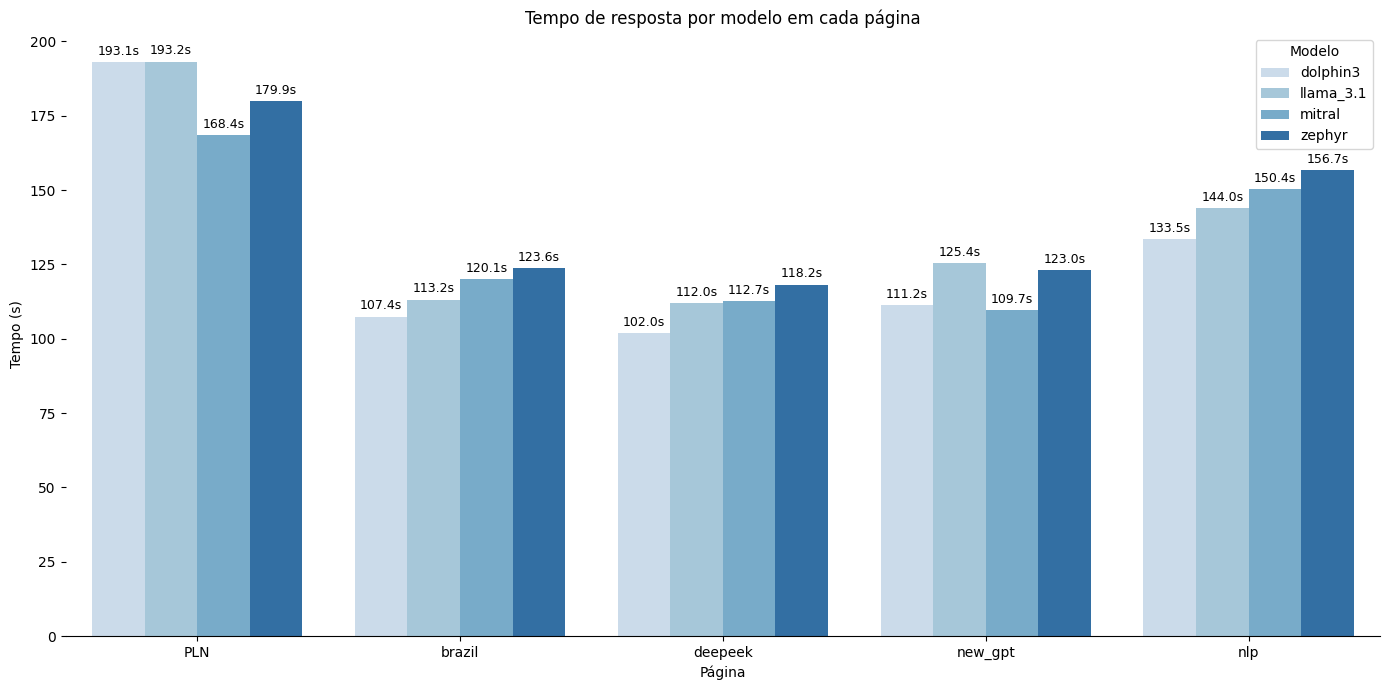

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular tempo médio de execução por linha
df['avg_time'] = df[[col for col in df.columns if col.startswith("time_")]].astype(float).mean(axis=1)

# Agrupar por página e modelo
df_grouped = df.groupby(['page', 'model'], as_index=False)['avg_time'].sum()

# Paleta de tons de azul personalizados para os modelos
azul_personalizado = ["#c6dbef", "#9ecae1", "#6baed6", "#2171b5"]

# Criar o gráfico
fig, ax = plt.subplots(figsize=(14, 7))
barplot = sns.barplot(
    data=df_grouped,
    x='page',
    y='avg_time',
    hue='model',
    palette=azul_personalizado,
    ax=ax
)

# Adicionar os valores no topo das barras
for p in barplot.patches:
    height = p.get_height()
    # Ignorar barras com altura 0
    if height > 0:
        ax.annotate(f'{height:.1f}s',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9, xytext=(0, 3),
                    textcoords='offset points')

# Ajustes visuais — remover bordas superior e direita
sns.despine(top=True, right=True, left=True)

# Remover a moldura da legenda (opcional)
ax.legend(title='Modelo', frameon=True)

# Títulos e eixos
ax.set_title('Tempo de resposta por modelo em cada página')
ax.set_ylabel('Tempo (s)')
ax.set_xlabel('Página')
plt.tight_layout()

# Exibir o gráfico
plt.show()

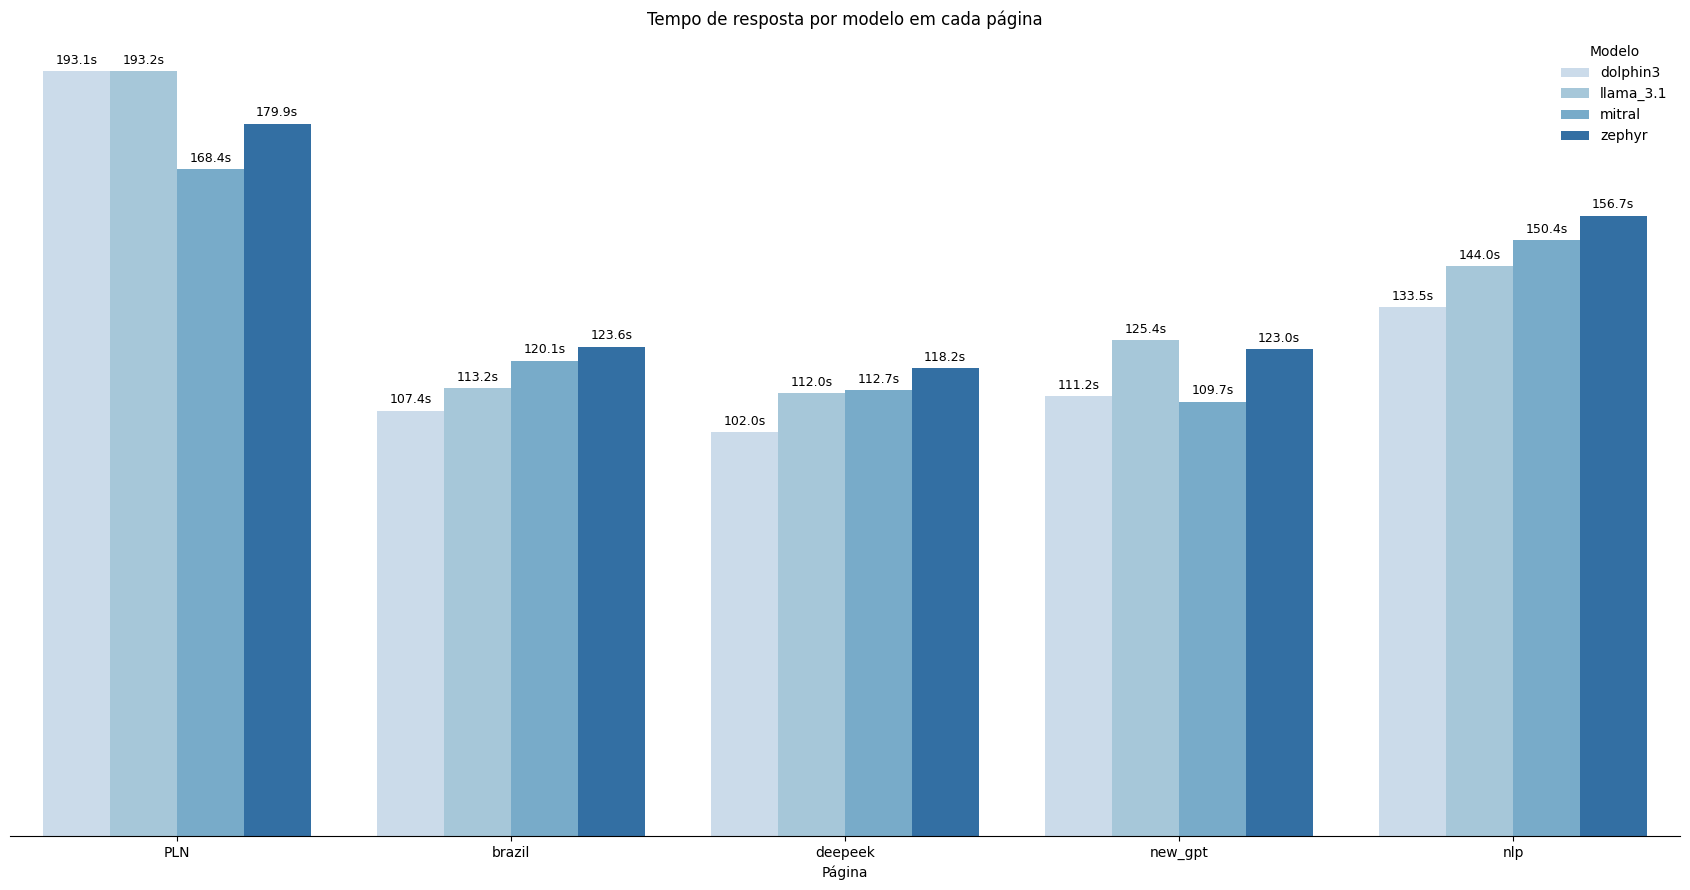

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular tempo médio de execução por linha
df['avg_time'] = df[[col for col in df.columns if col.startswith("time_")]].astype(float).mean(axis=1)

# Agrupar por página e modelo
df_grouped = df.groupby(['page', 'model'], as_index=False)['avg_time'].sum()

# Paleta de tons de azul personalizados para os modelos
azul_personalizado = ["#c6dbef", "#9ecae1", "#6baed6", "#2171b5"]

# Criar o gráfico
fig, ax = plt.subplots(figsize=(17, 9))
barplot = sns.barplot(
    data=df_grouped,
    x='page',
    y='avg_time',
    hue='model',
    palette=azul_personalizado,
    ax=ax
)

# Adicionar os valores no topo das barras
for p in barplot.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}s',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9, xytext=(0, 3),
                    textcoords='offset points')

# Remover os números da esquerda (eixo Y)
ax.set_yticks([])
ax.set_yticklabels([])

# Remover as bordas superior e direita
sns.despine(top=True, right=True, left=True)

# Remover moldura da legenda
ax.legend(title='Modelo', frameon=False)

# Título e eixos
ax.set_title('Tempo de resposta por modelo em cada página')
ax.set_ylabel('')
ax.set_xlabel('Página')
plt.tight_layout()

plt.show()

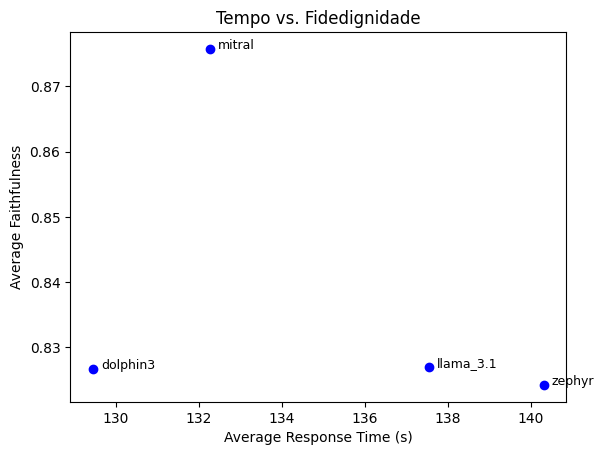

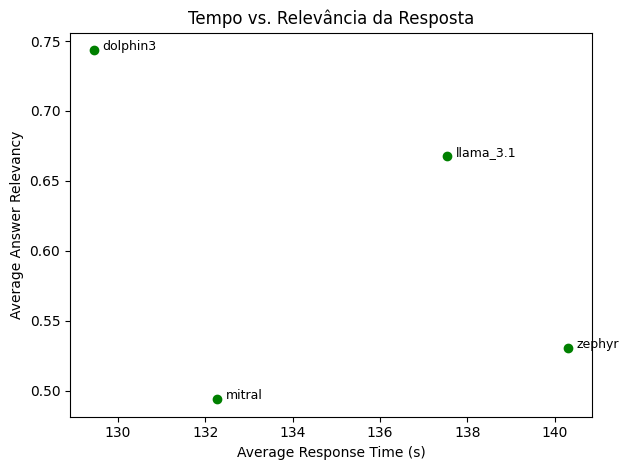

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregar o CSV
df = pd.read_csv("perfomance_sem_s.csv")

# Pré-processamento
time_cols = ['time_1', 'time_2', 'time_3', 'time_4', 'time_5']

df['avg_time'] = df[time_cols].mean(axis=1)

# Agrupamento por modelo
model_means = df.groupby('model', as_index=False).agg({
    'faithfulness': 'mean',
    'answer_relevancy': 'mean',
    'avg_time': 'mean'
})

# Scatter plot: Tempo vs Faithfulness com anotação
fig, ax1 = plt.subplots()
for _, row in model_means.iterrows():
    ax1.scatter(row['avg_time'], row['faithfulness'], color='blue')
    ax1.text(row['avg_time'] + 0.2, row['faithfulness'], row['model'], fontsize=9)
ax1.set_title('Tempo vs. Fidedignidade')
ax1.set_xlabel('Average Response Time (s)')
ax1.set_ylabel('Average Faithfulness')

# Scatter plot: Tempo vs Relevância com anotação
fig, ax2 = plt.subplots()
for _, row in model_means.iterrows():
    ax2.scatter(row['avg_time'], row['answer_relevancy'], color='green')
    ax2.text(row['avg_time'] + 0.2, row['answer_relevancy'], row['model'], fontsize=9)
ax2.set_title('Tempo vs. Relevância da Resposta')
ax2.set_xlabel('Average Response Time (s)')
ax2.set_ylabel('Average Answer Relevancy')

plt.tight_layout()
plt.show()

/var/folders/32/b57k_1bn041d4_xvfy_nv7vc0000gn/T/ipykernel_29578/1847319534.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_score   = df.groupby('Página')['Score'].sum()
/var/folders/32/b57k_1bn041d4_xvfy_nv7vc0000gn/T/ipykernel_29578/1847319534.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_faith  = df.groupby('Página')['faithfulness'].mean()
/var/folders/32/b57k_1bn041d4_xvfy_nv7vc0000gn/T/ipykernel_29578/1847319534.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or

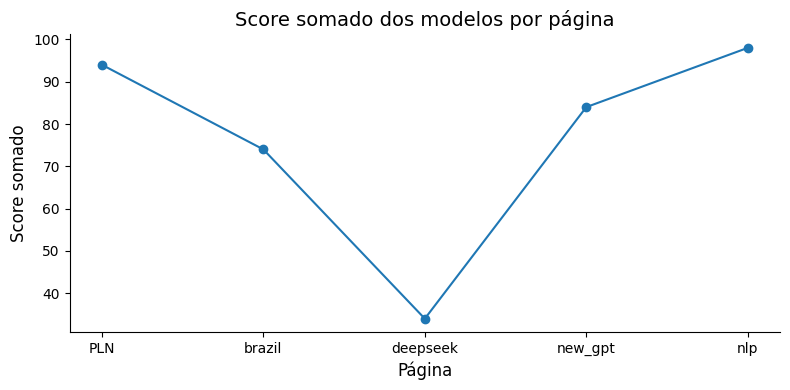

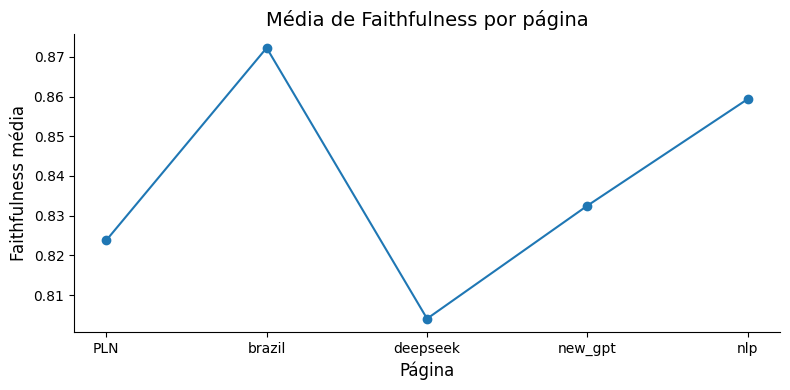

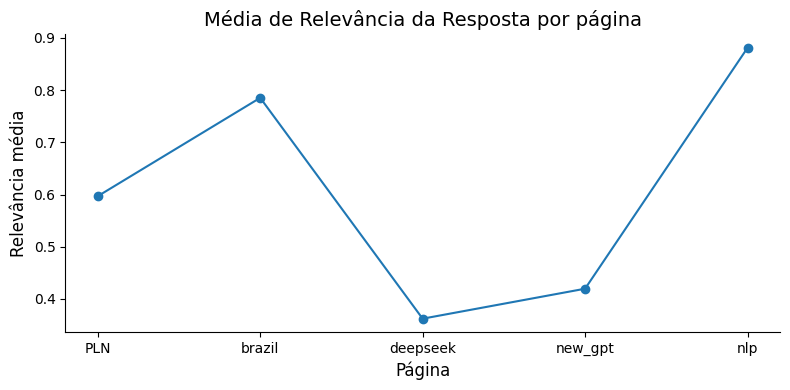

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Carregar os dados
df = pd.read_csv('perfomance_sem_s.csv')

# 2) Padronizar nome da coluna de página e corrigir typo
df = df.rename(columns={'page': 'Página'})
df['Página'] = df['Página'].replace({'deepeek': 'deepseek'})

# 3) Ordenar as páginas na sequência desejada
ordem = ['PLN', 'brazil', 'deepseek', 'new_gpt', 'nlp']
df['Página'] = pd.Categorical(df['Página'], categories=ordem, ordered=True)

# 4) Calcular agregações por página
sum_score   = df.groupby('Página')['Score'].sum()
mean_faith  = df.groupby('Página')['faithfulness'].mean()
mean_relev  = df.groupby('Página')['answer_relevancy'].mean()

# Função auxiliar para plotar e limpar bordas
def plot_line(x, y, title, ylabel, fname=None):
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(x, y, marker='o')
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Página', fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    if fname:
        plt.savefig(fname, dpi=300)
    plt.show()

# 5) Plotar cada métrica separadamente
plot_line(sum_score.index, sum_score.values,
          'Score somado dos modelos por página',
          'Score somado',
          fname='score_somado.png')

plot_line(mean_faith.index, mean_faith.values,
          'Média de Faithfulness por página',
          'Faithfulness média',
          fname='faithfulness_media.png')

plot_line(mean_relev.index, mean_relev.values,
          'Média de Relevância da Resposta por página',
          'Relevância média',
          fname='relevancia_media.png')